# Horizontal Cross-Sectional Views

We performed two JAX-ALFA simulations with grids: (i) 64x64x64 and (ii) 
128x128x128. All the computations use double precision on an NVIDIA 
A6000-Ada GPU. 

**Load the necessary packages**

In [112]:
import os
import re
import glob
import numpy as np
import matplotlib.pyplot as plt

**Input & Output Directories**

In [113]:
# User: please change these paths according to your directory structure
BaseDir   = ('/Users/sukantabasu/Dropbox/Codes/LES/JAX-ALFA/JAXALFA0.1/')

# 64x64x64 run
CaseDir1   = os.path.join(BaseDir, 'examples/NBL_A94/runs/64x64x64/')
OutputDir1 = os.path.join(CaseDir1, 'output/') 

# 128x128x128 run
CaseDir2   = os.path.join(BaseDir, 'examples/NBL_A94/runs/128x128x128/')
OutputDir2 = os.path.join(CaseDir2, 'output/') 

**Load 3D fields from T = 27 h**

In [114]:
# 64x64x64 run
OutputFiles1 = os.path.join(OutputDir1, 'ALFA_3DFields_Iteration_97200.npz')
File3D_1 = np.load(OutputFiles1)
u3D_1 = File3D_1['u']

# 128x128x128 run
OutputFiles2 = os.path.join(OutputDir2, 'ALFA_3DFields_Iteration_194400.npz')
File3D_2 = np.load(OutputFiles2)
u3D_2 = File3D_2['u']

**Input Information from the Config File**

In [115]:
# Common settings across the simulations
l_x = 4000 # domain length (m)
l_y = 4000 # domain width (m)
l_z = 1500 # domain height (m)
SimTime = 100000  # total simulation time (sec)
OutputInterval = 60 # frequency of output (sec)

In [116]:
# Simulation 1
nx_1 = 64 # number of grid points in x direction
ny_1 = 64 # number of grid points in y direction
nz_1 = 64 # number of grid points in z direction
dx_1 = l_x / nx_1
dy_1 = l_y / ny_1
dz_1 = l_z / (nz_1 - 1)
x_axis_1 = dx_1 * np.arange(nx_1)
y_axis_1 = dy_1 * np.arange(ny_1)

# Simulation 2
nx_2 = 128 # number of grid points in x direction
ny_2 = 128 # number of grid points in y direction
nz_2 = 128 # number of grid points in z direction
dx_2 = l_x / nx_2
dy_2 = l_y / ny_2
dz_2 = l_z / (nz_2 - 1)
x_axis_2 = dx_2 * np.arange(nx_2)
y_axis_2 = dy_2 * np.arange(ny_2)

**Derived Variables**

In [117]:
# Half levels for u, v, TH variables
z_u_1 = np.array([(k + 0.5) * l_z / (nz_1 - 1) for k in range(nz_1)])
z_u_2 = np.array([(k + 0.5) * l_z / (nz_2 - 1) for k in range(nz_2)])

**Plot horizontal cross-section of vertical velocity fields: 64x64x64 run**

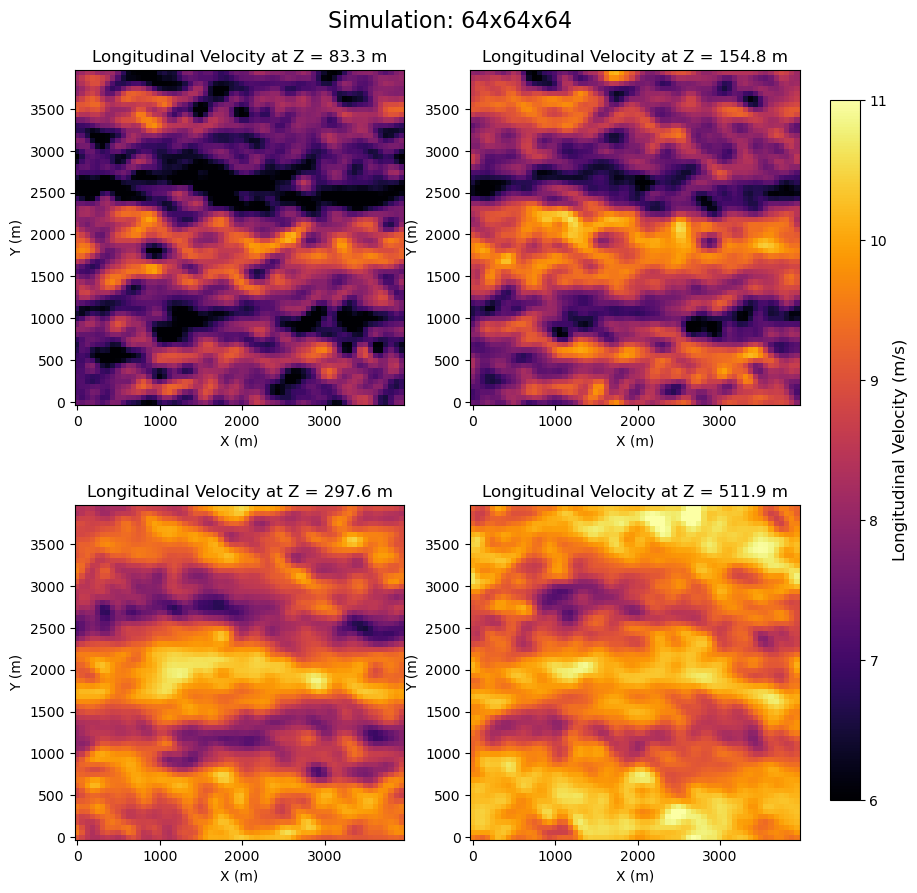

In [118]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  
axes = axes.flatten()

# Selected cross-sections at l_z/20, l_z/10, l_z/5, and l_z/3 
k_levels = [int(nz_1/20), int(nz_1/10), int(nz_1/5), int(nz_1/3)]  

# Colorbar range
vmin = 6
vmax = 11

for i, k in enumerate(k_levels):
    im = axes[i].pcolor(x_axis_1, y_axis_1, u3D_1[:,:,k].T, cmap='inferno', 
                        vmin=vmin, vmax=vmax)
    axes[i].set_title(f'Longitudinal Velocity at Z = {z_u_1[k]:.1f} m', 
                      fontsize=12)
    axes[i].set_xlabel('X (m)')
    axes[i].set_ylabel('Y (m)')
    axes[i].set_aspect('auto')  

plt.subplots_adjust(hspace=0.3, right=0.85)  

cbar_ax = fig.add_axes([0.88, 0.15, 0.03, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Longitudinal Velocity (m/s)', fontsize=12)

plt.suptitle('Simulation: 64x64x64', fontsize=16, y=0.94)
plt.show()

**Plot horizontal cross-section of vertical velocity fields: 128x128x128 run**

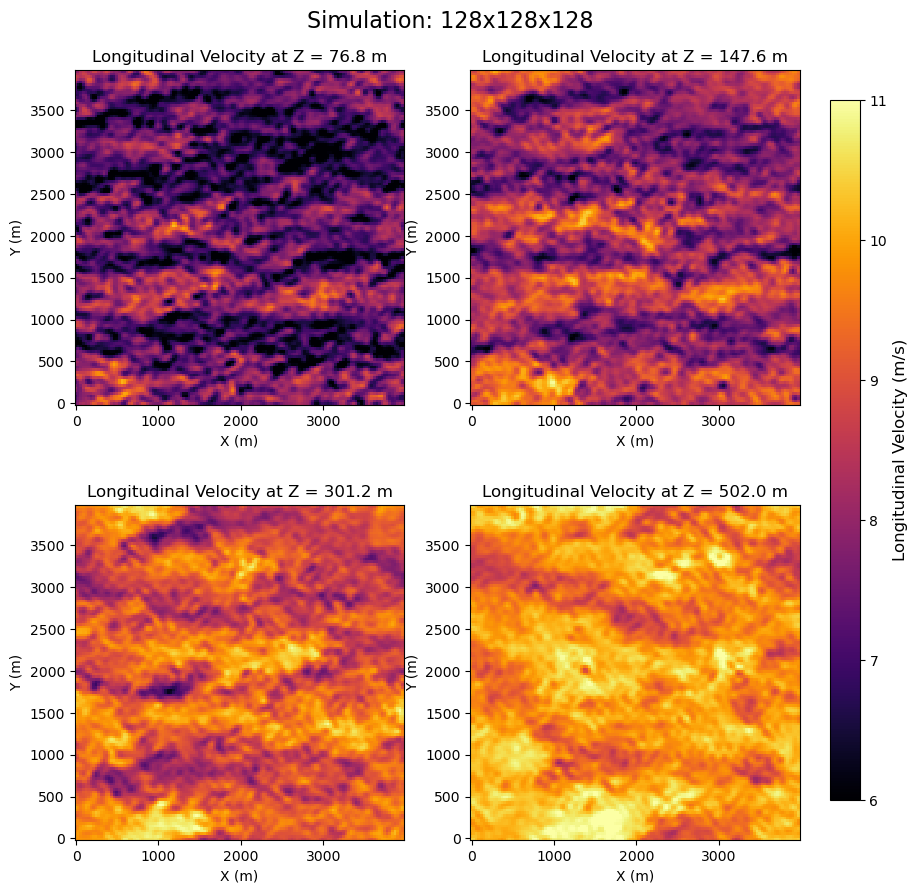

In [119]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  
axes = axes.flatten()

# Selected cross-sections at l_z/20, l_z/10, l_z/5, and l_z/3 
k_levels = [int(nz_2/20), int(nz_2/10), int(nz_2/5), int(nz_2/3)]  

# Colorbar range
vmin = 6
vmax = 11

for i, k in enumerate(k_levels):
    im = axes[i].pcolor(x_axis_2, y_axis_2, u3D_2[:,:,k].T, cmap='inferno', 
                        vmin=vmin, vmax=vmax)
    axes[i].set_title(f'Longitudinal Velocity at Z = {z_u_2[k]:.1f} m', 
                      fontsize=12)
    axes[i].set_xlabel('X (m)')
    axes[i].set_ylabel('Y (m)')
    axes[i].set_aspect('auto')  

plt.subplots_adjust(hspace=0.3, right=0.85)  

cbar_ax = fig.add_axes([0.88, 0.15, 0.03, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Longitudinal Velocity (m/s)', fontsize=12)

plt.suptitle('Simulation: 128x128x128', fontsize=16, y=0.94)
plt.show()